**ANALYSER LES VENTES DE L'ENTREPRISE 'RESTER LIVRES'**

    Mission n°2 - Analyse de données : trouver les informations qui ont du sens pour mieux comprendre les ventes.

**Data sources**

- data.csv : *table de jointure des data des tables customers, products et sales.*

**Modifications**



- Suppressions des tests Khi2 sauf pour corrélation genre vs catégorie.

# Tools

In [3]:
# Librairies

# System
from pathlib import Path

# Global 
import numpy as np
import pandas as pd
import re #pour expressions regulieres

# Statistics
import scipy.stats as ss
from scipy.stats import norm
from scipy.stats import kurtosis, skew
from scipy.stats import linregress

# Plot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import pylab # Etiquettes de données sur boxplot
import seaborn as sns
sns.set()

In [4]:
# Data

data = Path.cwd() / "data" / "processed" / "data_prep.csv"
df_prod = Path.cwd() / "data" / "interim" / "products_prep.csv"

df = pd.read_csv(data)
df_prod = pd.read_csv(df_prod)

In [5]:
# Dataframe source

df.head()

,id_prod,date,id_session,id_client,YMD,Y,Heure,M,J,price,categ,sex,birth,session,age
0,0_1483,2021-04-10 18:37:28.723910,18746,4450,2021-04-10,2021,18:37:28:723910,4,10,4.99,0,f,1977,1,45
1,2_226,2022-02-03 01:55:53.276402,159142,277,2022-02-03,2022,01:55:53:276402,2,3,65.75,2,f,2000,1,22
2,1_374,2021-09-23 15:13:46.938559,94290,4270,2021-09-23,2021,15:13:46:938559,9,23,10.71,1,f,1979,1,43
3,0_2186,2021-10-17 03:27:18.783634,105936,4597,2021-10-17,2021,03:27:18:783634,10,17,4.20,0,m,1963,1,59
4,0_1351,2021-07-17 20:34:25.800563,63642,1242,2021-07-17,2021,20:34:25:800563,7,17,8.99,0,f,1980,1,42


In [6]:
# Restriction sur les annees

df21 = df[df.Y == 2021]

df22 = df[df.Y == 2022]

In [7]:
# Restriction sur les catégories

df0 = df[df.categ == 0]

df1 = df[df.categ == 1]

df2 = df[df.categ == 2]

# Exploration

## L'offre

In [8]:
# Offre globale

df_prod.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.860515,0.370246
std,29.845766,0.615387
min,0.620000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [68]:
# Prix le plus fréquent

df_prod.price.mode()

0    4.99
dtype: float64

In [10]:
# Offre par categories

df0_prod = df0.drop_duplicates(subset = ['id_prod'])

df1_prod = df1.drop_duplicates(subset = ['id_prod'])

df2_prod = df2.drop_duplicates(subset = ['id_prod'])


px = pd.DataFrame({'categorie': [0,1,2],
'Min': [df0_prod.price.min(),df1_prod.price.min(),df2_prod.price.min()],
'Max': [df0_prod.price.max(),df1_prod.price.max(),df2_prod.price.max()],
'Mean': [df0_prod.price.mean(),df1_prod.price.mean(),df2_prod.price.mean()],
'Median': [df0_prod.price.median(),df1_prod.price.median(),df2_prod.price.median()], 
'Mode':[df0_prod.price.mode()[0],df1_prod.price.mode()[0],df2_prod.price.mode()[0]],
'Skewness':[df0_prod.price.skew(),df1_prod.price.skew(),df2_prod.price.skew()],
'Kurtosis':[df0_prod.price.kurtosis(),df1_prod.price.kurtosis(),df2_prod.price.kurtosis()], 
'Variance': [df0_prod.price.var(ddof=0),df1_prod.price.var(ddof=0),df2_prod.price.var(ddof=0)],
'StDev':[df0_prod.price.std(ddof=0),df1_prod.price.std(ddof=0),df2_prod.price.std(ddof=0)]})

px

,categorie,Min,Max,Mean,Median,Mode,Skewness,Kurtosis,Variance,StDev
0,0,0.62,40.99,11.716394,10.32,4.99,0.847620,0.369932,56.569447,7.521266
1,1,2.00,80.99,25.503623,22.99,22.99,0.816858,0.304408,237.930484,15.424995
2,2,30.99,300.00,107.487319,100.99,50.99,0.960400,0.902301,2420.893566,49.202577


C:\Users\Aurelie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


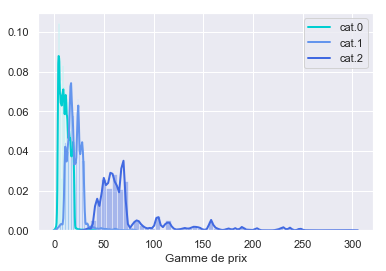

In [11]:
# Offre par cat. 

f, axes = plt.subplots()

x0 = pd.Series(df0['price'])
x1 = pd.Series(df1['price'])
x2 = pd.Series(df2['price'], name="Gamme de prix")

sns.distplot(x0, color="darkturquoise",kde_kws={"color": "darkturquoise", "lw": 2, "label": "cat.0"})
sns.distplot(x1 , color="cornflowerblue",kde_kws={"color": "cornflowerblue", "lw": 2, "label": "cat.1"}) 
sns.distplot(x2 , color="royalblue", kde_kws={"color": "royalblue", "lw": 2, "label": "cat.2"})

plt.savefig('reports/Produits/Hist_offre.png') 

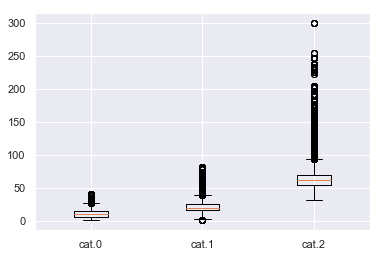

In [12]:
# Box plot offre produits

x0 = pd.Series(df0['price']).tolist()
x1 = pd.Series(df1['price']).tolist()
x2 = pd.Series(df2['price']).tolist()
dataset = [x0,x1,x2]

# Plot 
BoxName = ['cat.0', 'cat.1', 'cat.2']
plt.boxplot(dataset)
pylab.xticks([1,2,3], BoxName)

plt.savefig('reports/Produits/boxplot_offre.png') 

<div class="alert alert-block alert-info">
<b>Tip:</b> On a 3 catégories de produits :
   
- Produits de catégorie 0 : Entrée de gamme de prix 
    
- Produits de catégorie 1 : Moyenne gamme de prix 
    
- Produits de catégorie 2 : Haute gamme de prix 


- Au global:
    - 'Rester livres' propose majoritairement des livres à prix faibles : le prix le plus courant est 2.99€.
    -  La gamme de prix est large : de quelques centimes à 300€.

</div>

## Les ventes

### Statistiques descriptives

In [13]:
# Dataframe : aggrégation sur les paniers

temp = df.groupby(['categ','id_session','YMD']).sum().reset_index()[['YMD','id_session','categ','price']]
temp.head()

,YMD,id_session,categ,price
0,2021-03-01,1,0,11.990000
1,2021-03-01,2,0,19.370000
2,2021-03-01,3,0,26.402795
3,2021-03-01,4,0,6.550000
4,2021-03-01,5,0,16.490000


In [14]:
# Stats descriptives

temp['price'].describe()

count    200762.000000
mean         26.717379
std          25.768692
min           0.620000
25%          12.990000
50%          19.740000
75%          30.470000
max         539.230000
Name: price, dtype: float64

### Distribution

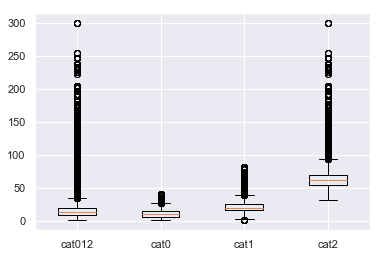

In [15]:
# Distribution du montant des paniers pour chaque catégorie

data_012 = df.price.tolist()
data_0 = df0.price.tolist()
data_1 = df1.price.tolist()
data_2 = df2.price.tolist()
dataset = [data_012,data_0,data_1,data_2]

# Plot 
BoxName = ['cat012','cat0','cat1','cat2']
plt.boxplot(dataset)
pylab.xticks([1,2,3,4], BoxName)

plt.savefig('reports/Ventes/boxplot_vente_cat.png')
plt.show()

<div class="alert alert-block alert-info">
<b>Tip:</b> On a 3 catégories de produits qui correspondent à 3 gammes de prix, cela se traduit par des gammes de paniers:
   
- Panier de catégorie 0 :
    - Entrée de gamme de prix : le montant des paniers est concentré sur les plus faibles valeurs.
    - Peu de panier sortent du lot.
    
- Panier de catégorie 1 :
    - Moyenne gamme de prix : le montant des paniers est légèremement plus étalé vers les plus grandes valeurs.
    - Quelques paniers sortent du lot.
    
- Panier de catégorie 2 :
    - Haute gamme de prix : le montant des paniers est plus élevé.
    - Beaucoup de paniers sortent du lot.

</div>

### Panier 

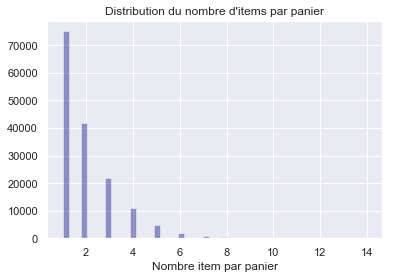

In [16]:
# Distribution du nombres d'items par panier par client

df_corr2 = df.groupby(['age','id_session']).sum().reset_index()

x = pd.Series(df_corr2.session, name="Nombre item par panier")
sns.distplot(x, color="navy",kde=False)

plt.title('Distribution du nombre d\'items par panier')
plt.savefig('reports/Clients/items_panier.png')

<div class="alert alert-block alert-info">
On voit qu'il y a beaucoup plus de paniers contenant peu d'items (logique). Mais traduit le fait qu'au lieu d'optimiser leur frais de port les clients préfèrent mettre peu d'items dans leur panier. 

On a vu dans la partie Nettoyage que des données étaient manquantes sur le mois d'Octobre. Les résultats ci-après présentent le panier moyen avec correction sur les datas.

In [17]:
# Panier moyen corrigé au mois d'Octobre
CA_m2 = df.groupby(['Y','M','categ']).sum().reset_index()[['M','categ','price', 'session']]
CA_m2.iloc[22,2] = CA_m2[CA_m2['categ'] == 1]['price'].mean() # correction du CA
CA_m2.iloc[22,3] = CA_m2[CA_m2['categ'] == 1]['session'].mean() # correction du nb de ventes

# Calcul du prix du panier moyen par mois
Octobre = CA_m2[CA_m2.M == 10].price.sum()

# Nombres de ventes corrigées
Octobre2 = CA_m2[CA_m2.M == 10].session.sum()


# Panier moyen non corrigé au mois d'Octobre
CA_m1 = df.groupby(['Y','M']).sum().reset_index()[['Y','M','price','session']] # Aggregation par mois

CA_m1['panier moyen'] = CA_m1['price']/CA_m1['session'] # Calcul panier moyen


# Correction
CA_m1_2 = CA_m1.copy()
CA_m1_2.iloc[7,2] = Octobre # On remplace les valeurs dans le tableau mensuel du CA
CA_m1_2.iloc[7,3] = Octobre2

CA_m1_2['panier moyen'] = CA_m1_2['price']/CA_m1_2['session'] 
CA_m1_2[['Y','M', 'panier moyen']]

,Y,M,panier moyen
0,2021,3,16.645803
1,2021,4,16.503587
2,2021,5,17.208211
3,2021,6,17.787554
4,2021,7,19.333854
5,2021,8,18.527011
6,2021,9,15.094603
7,2021,10,16.228516
8,2021,11,18.077135
9,2021,12,16.067139


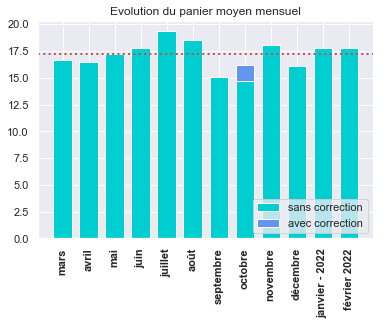

In [18]:
# Observation du panier moyen par mois  

fig, ax = plt.subplots()

# Values of each group
bars0 = CA_m1['panier moyen'].tolist()
bars1 = CA_m1_2['panier moyen'].tolist()
mean = CA_m1_2['panier moyen'].mean()

# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11]

# Names of group and bar width
names = ['mars','avril','mai','juin','juillet','août','septembre','octobre','novembre','décembre','janvier - 2022',
         'février 2022']
barWidth = 0.7

# Create bars
p1 = plt.bar(r, bars1, color='cornflowerblue', edgecolor='white', width=barWidth)
p0 = plt.bar(r, bars0, color='darkturquoise', edgecolor='white', width=barWidth)
ax.axhline(y=mean, color='r', linestyle='dotted',linewidth=2,label='Prix moyen du panier')

# Custom X axist
plt.xticks(r, names, fontweight='bold', rotation=90)

# Legend
plt.legend((p0[0],p1[0]), ('sans correction', 'avec correction'), loc='lower right')
plt.title('Evolution du panier moyen mensuel')

# back-up
plt.savefig('reports/Ventes/Panier_mois_stack.png')

# Show graphic
plt.show()

<div class="alert alert-block alert-info">
<b>Tip:</b> 

- Le panier moyen se situe entre 15 et 20€ / mois.   

In [19]:
# Nombre d'items par panier aggrégation sur mois

temp = df.groupby(['M','id_session']).sum().reset_index()
temp.session.describe()

count    157853.000000
mean          1.986982
std           1.272459
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          14.000000
Name: session, dtype: float64

In [20]:
# Nombres d'items moyens par panier et par mois
temp = temp.groupby(['M']).mean()
temp.head()

,id_session,id_client,Y,J,price,categ,birth,session,age
M,,,,,,,,,
1,150590.010571,8577.410357,3956.043000,30.795143,34.759575,1.017429,3868.537000,1.956500,87.506000
2,165264.065574,8976.180028,4168.719515,30.087432,36.696277,0.972902,4077.616438,2.061681,91.103077
3,7102.653195,8701.889817,4048.388350,31.870174,33.344224,0.818845,3961.873109,2.003161,88.518401
4,21181.414246,8796.438144,4105.825957,31.669587,33.528379,0.748963,4018.732903,2.031581,89.124635
5,35227.265229,8672.804724,4026.649856,31.726872,34.285721,0.800319,3940.874297,1.992405,87.767963


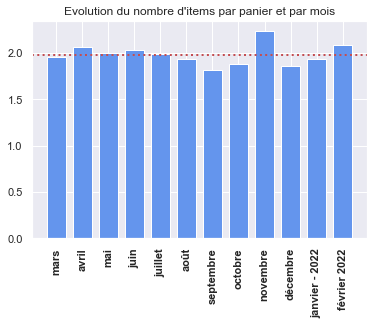

In [21]:
# Observation du nombre d'items par mois  

fig, ax = plt.subplots()

# Values of each group
bars0 = temp['session'].tolist()

mean = temp['session'].mean()

# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11]

# Names of group and bar width
names = ['mars','avril','mai','juin','juillet','août','septembre','octobre','novembre','décembre','janvier - 2022',
         'février 2022']
barWidth = 0.7

# Create bars
p1 = plt.bar(r, bars0, color='cornflowerblue', edgecolor='white', width=barWidth)

ax.axhline(y=mean, color='r', linestyle='dotted',linewidth=2,label='Nb items moyen par panier')

# Custom X axis
plt.xticks(r, names, fontweight='bold', rotation=90)

# Legend
plt.title('Evolution du nombre d\'items par panier et par mois')

# back-up
plt.savefig('reports/Ventes/Panier_item.png')

# Show graphic
plt.show()

### CA

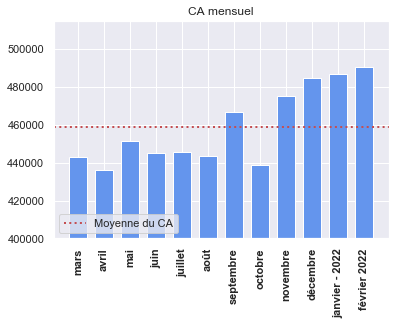

In [22]:
# Observation du CA par mois

fig, ax = plt.subplots()

# Values of each group
bars1 = CA_m1_2['price'].tolist()
mean = CA_m1_2['price'].mean()


# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8,9,10,11]

# Names of group and bar width
names = ['mars','avril','mai','juin','juillet','août','septembre','octobre','novembre','décembre','janvier - 2022',
         'février 2022']
barWidth = 0.7

# Create bars
p1 = plt.bar(r, bars1, color='cornflowerblue', edgecolor='white', width=barWidth)
ax.axhline(y=mean, color='r', linestyle='dotted',linewidth=2,label='Moyenne du CA')


# Custom X axis
plt.xticks(r, names, fontweight='bold', rotation=90)
ax.set_ylim(bottom=400000) # ymin = 400 000 pour mieux discriminer les mois

# Legend
plt.legend(loc='lower left')
plt.title('CA mensuel')

# back-up
plt.savefig('reports/Ventes/CA_mois.png')

# Show graphic
plt.show()

<div class="alert alert-block alert-info">
<b>Tip:</b> 

- Novembre : prix Goncourt, prix Renaudot et prix Femina génèrent potentiellement plus de ventes.
- Rentrée Littéraire : entre Septembre et début Novembre génèrent potentiellement plus de ventes. 
- Fêtes de fin d'année : génèrent potentiellement plus de ventes.

<div class="alert alert-block alert-info">

Au regard du graphique, la correction du CA de la cat.1 du mois d'Octobre par la moyenne de la catégorie n'est pas optimale. Une correction via une courbe de tendance serait certainement plus représentatif de ce que l'on observe en fin d'année.

In [23]:
# CA Total en 2021

CA_m1_2.price.iloc[:10].sum()

4530214.993619995

## La clientèle 

### Portefeuille clients

In [24]:
# Portefeuille annuel

# Clientèle totale
TOT_cust = len(df.id_client.unique())

# En 2021
TOT21_cust = len(df21.id_client.unique())

# En 2022
TOT22_cust = len(df22.id_client.unique())

# Variations de la clientèle
cust = pd.DataFrame({'Year': ['TOT',2021,2022],
                    'count': [TOT_cust, TOT21_cust, TOT22_cust],
                    'new': [0,0,TOT_cust-TOT21_cust],
                    'old': [0,0,TOT22_cust-(TOT_cust-TOT21_cust)],
                    'ratio new/old':[0,0,((TOT_cust-TOT21_cust)/(TOT22_cust-(TOT_cust-TOT21_cust)))],
                    'perte': [0,0,TOT21_cust-(TOT22_cust-(TOT_cust-TOT21_cust))],
                    'ratio perte':[0,0, (TOT21_cust-(TOT22_cust-(TOT_cust-TOT21_cust)))/TOT21_cust]})

cust

,Year,count,new,old,ratio new/old,perte,ratio perte
0,TOT,8596,0,0,0.000000,0,0.000000
1,2021,8575,0,0,0.000000,0,0.000000
2,2022,7216,21,7195,0.002919,1380,0.160933


<div class="alert alert-block alert-info">
<b>Tip:</b>

- 16% des clients ayant achetés en 2021 n'ont pas acheté à nouveau en 2022.
- Le taux de nouveaux clients en 2022 est très faible (0,2%), il faudrait le comparer avec le nombres de visites pour savoir si cela est du à une faible notoriété du site OU à un faible taux de conversion (nb achats/nb visites).

<div>

### Buyer Persona

In [25]:
# Nombres de clients par tranche d'âge et genre

temp = pd.crosstab(pd.cut(df.age,[18,20,30,40,50,60,70,80,90,100]), df.sex, normalize = True, 
                   margins = True, margins_name = 'Total')

temp = temp.sort_values(by='Total', ascending = False)
temp

sex,f,m,Total
age,,,
Total,0.519969,0.480031,1.000000
"(30, 40]",0.163707,0.155509,0.322060
"(50, 60]",0.067185,0.061880,0.319217
"(70, 80]",0.019020,0.015563,0.129065
"(60, 70]",0.044639,0.040509,0.085148
"(20, 30]",0.042912,0.037447,0.080358
"(80, 90]",0.008697,0.005557,0.034583
"(40, 50]",0.167106,0.154954,0.014384
"(18, 20]",0.006281,0.008103,0.014254


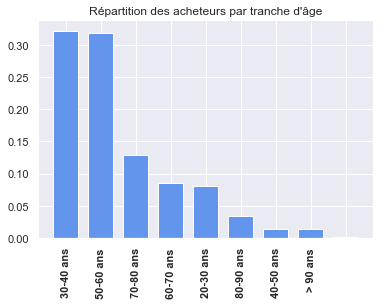

In [26]:
# Valeurs de chaque groupe
bars = temp.iloc[1:,2].tolist()

# The position of the bars on the x-axis
r = [0,1,2,3,4,5,6,7,8]

# Names of group and bar width
names = ['30-40 ans','50-60 ans','70-80 ans', '60-70 ans','20-30 ans','80-90 ans','40-50 ans', '> 90 ans'] 
barWidth = 0.7

# Create bars
p1 = plt.bar(r, bars, color='cornflowerblue', edgecolor='white', width=barWidth)

# Set x axis
plt.xticks(r, names, fontweight='bold', rotation=90)
plt.title('Répartition des acheteurs par tranche d\'âge')

# back-up
plt.savefig('reports/Clients/persona4.png')

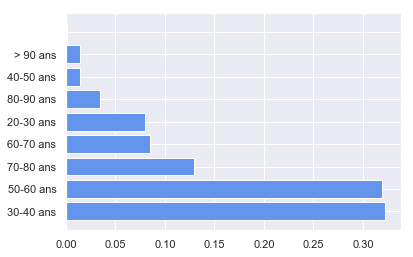

In [27]:
# idem
x = temp.iloc[1:,2].tolist()
y = [0,1,2,3,4,5,6,7,8]

# Create horizontal bars
plt.barh(y, x, color = 'cornflowerblue')
 
# Create names on the y-axis
names = ['30-40 ans','50-60 ans','70-80 ans', '60-70 ans','20-30 ans','80-90 ans','40-50 ans', '> 90 ans'] 
plt.yticks(r, names)
 
# Show graphic
plt.show()


### Âge vs catégorie d'achat

#### Statistique Descriptive

In [28]:
# Âge de la clientèle de chaque groupe 

age = pd.DataFrame({'categorie': ['012',0,1,2],
'n total':[len(df.age),len(df0.age), len(df1.age),len(df2.age)],
'n unique':[len(df.id_client.unique()),len(df0.id_client.unique()),len(df1.id_client.unique()),len(df2.id_client.unique())],
'Mean': [df.age.mean(),df0.age.mean(), df1.age.mean(),df2.age.mean()],
'Median': [df.age.median(), df0.age.median(),df1.age.median(), df2.age.median()], 
'Mode':[df.age.mode()[0], df0.age.mode()[0],df1.age.mode()[0], df2.age.mode()[0]],
'Variance': [df.age.var(ddof=0), df0.age.var(ddof=0),df1.age.var(ddof=0),df2.age.var(ddof=0)],
'StDev':[df.age.std(ddof=0), df0.age.std(ddof=0),df1.age.std(ddof=0),df2.age.std(ddof=0)],          
'Skewness': [df.age.skew(),df0.age.skew(),df1.age.skew(), df2.age.skew()], 
'Kurtosis': [df.age.kurtosis(), df0.age.kurtosis(),df1.age.kurtosis(),df2.age.kurtosis()] })

age['Limite Out. 2'] = 2 * age['StDev'] + age['Mean']
age['Limite Out. 3'] = 3 * age['StDev'] + age['Mean']

age

,categorie,n total,n unique,Mean,Median,Mode,Variance,StDev,Skewness,Kurtosis,Limite Out. 2,Limite Out. 3
0,012,313651,8596,44.206567,43.0,43,190.356685,13.796981,0.602484,0.366942,71.800529,85.597510
1,0,195270,7878,43.799872,42.0,34,132.544396,11.512793,1.020743,1.648792,66.825457,78.338250
2,1,102625,8449,47.813856,47.0,43,249.721112,15.802567,0.195865,-0.494563,79.418990,95.221556
3,2,15756,3270,25.751206,24.0,18,92.776258,9.632043,2.999877,10.967403,45.015293,54.647336


- On considère que l’échantillon suit une loi normale à 95 % lorsque la valeur de son aplatissement (kurtosis) est compris entre -2 et +2.

http://www.cons-dev.org/elearning/stat/parametrique/5-3/5-3.html

- Quand on dispose de données ayant une forme de distribution normal (ou y ressemblant grandement), on peut utiliser les écart-types (standard deviation) pour faire une délimitation des outliers. Généralement, on convient à 2 ou 3 standard deviations à partir de la moyenne de la distribution (des deux côtés da la moyenne) pour délimiter la limite à partir de laquelle ce qui se trouve en dehors de cette limite est considéré comme valeur aberrante.

https://mrmint.fr/outliers-machine-learning

<div class="alert alert-block alert-info"> 
    
- On s'attend à une distribution de type Normale au global et pour la catégorie 1.
- On s'attend à une distribution proche de la Normale pour la catégorie 0.
- On ne s'attend pas à une distribution Normale pour la catégorie 2.

#### Distribution

C:\Users\Aurelie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


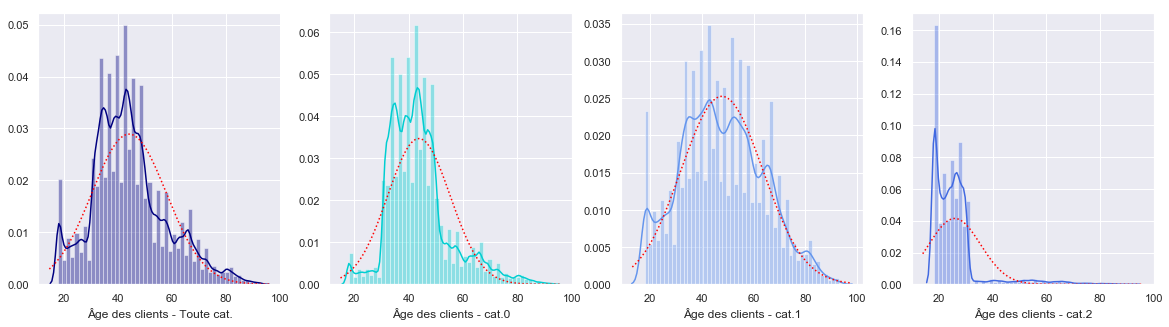

In [29]:
# Distribution de l'âge des clients par cat. (4 plots)

#Figure
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(20,5))

x = pd.Series(df.age, name="Âge des clients - Toute cat.")
x0 = pd.Series(df0.age, name="Âge des clients - cat.0")
x1 = pd.Series(df1.age, name="Âge des clients - cat.1")
x2 = pd.Series(df2.age, name="Âge des clients - cat.2")

sns.distplot(x, color="navy", ax=ax1,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x0, color="darkturquoise", ax=ax2,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x1 , color="cornflowerblue", ax=ax3,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})
sns.distplot(x2 , color="royalblue", ax=ax4,fit=norm,fit_kws={"color": "red",'linestyle':'dotted'})

plt.savefig('reports/Clients/Hist_age_4plot.png') 
plt.show()

<div class="alert alert-block alert-info">

Au global, notre dataset est de type Gaussien.
    
   - Cat.0 : type Gaussien avec asymétrie positive.
   - Cat.1 : type Gaussien légère asymétrie positive.
   - Cat.2 : tendance Gaussienne avec forte asymétrie positive.

</div>

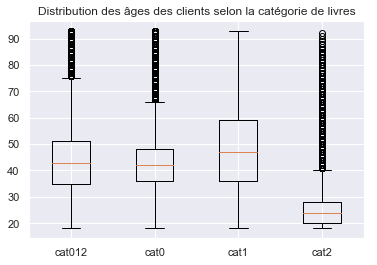

In [30]:
# Caracteristiques des clients par cat.

data_012 = df.age.tolist()
data_0 = df0.age.tolist()
data_1 = df1.age.tolist()
data_2 = df2.age.tolist()
dataset = [data_012,data_0,data_1,data_2]

# Plot 
BoxName = ['cat012','cat0','cat1','cat2']
plt.boxplot(dataset)
pylab.xticks([1,2,3,4], BoxName)

plt.title('Distribution des âges des clients selon la catégorie de livres')
plt.savefig('reports/Clients/boxplot_age_cat.png')
plt.show()

<div class="alert alert-block alert-info">
    
Cat.0 :
- Moyenne autour de 40 ans.
- Touche un public plus restreint en termes d'âges.

Cat.1 : 
- Moyenne autour de 45 ans.
- Intéressent des clients d'âges majoritairement situés entre 30 et 55 ans. 
- Large public.

Cat.2: 
- Les clients de la cat.2 ont en moyenne 30 ans / médiane 24 ans : des clients plus âgés que la majorité des clients de la catégorie 'tirent' les valeurs vers le haut (outliers). 
- La cat.2 intéressent globalement des clients plus jeunes que les autres cat, situés entre 18 et 40 ans.

**--> Avec les 3 cat. de produits on recouvre un large spectre d'âge**

</div>

#### Corrélation

**Coefficient de corrélation linéaire ou Coefficient de Pearson : R2**

La valeur du coefficient de corrélation varie dans l’intervalle -1 à +1 : on peut donc facilement l’interpréter et comparer les valeurs de différents coefficients de corrélation entre eux.

Une valeur négative du coefficient de corrélation signifie que lorsque l’une des deux variables tend à décroître, l’autre tend à augmenter : les variables sont corrélées négativement.

A l’inverse, une valeur positive du coefficient de corrélation signifie que lorsque l’une de ces deux variables tend à croître, l’autre tend également à augmenter : les deux variables sont corrélées positivement.

Plus la valeur du coefficient de corrélation est proche de zéro, moins forte est la relation entre les deux variables.

In [32]:
# Tableau de contingence: âge / cat.

tab2 = pd.crosstab(df.age, df.categ).reset_index()

tab2 = tab2.rename(index=str, columns={0: "cat.0",1: "cat.1",2: "cat.2" })

tab2.head()

categ,age,cat.0,cat.1,cat.2
0,18,1668,2759,2921
1,19,488,817,877
2,20,498,830,896
3,21,461,732,839
4,22,587,791,797


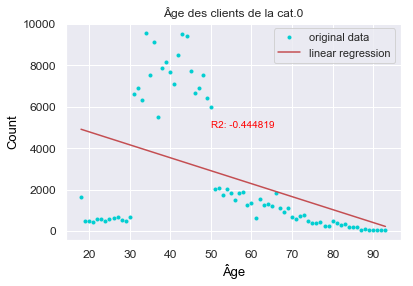

In [33]:
# Linéarisation sur âge des clients - produit de cat.0

# Observation de la relation entre l'âge des clients et le montant total des achats
X = tab2['age']
Y = tab2['cat.0']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X, Y)

# Plot
plt.plot(X, Y, '.', label='original data', color='darkturquoise')
plt.plot(X, intercept + slope*X, 'r', label='linear regression')

# Plot settings
plt.title('Âge des clients de la cat.0')
plt.text(50,5000,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Âge', color='black', size=13)
plt.xticks(size=12)
plt.ylabel('Count', color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/lineaire_age_cat.0.png')
plt.show()

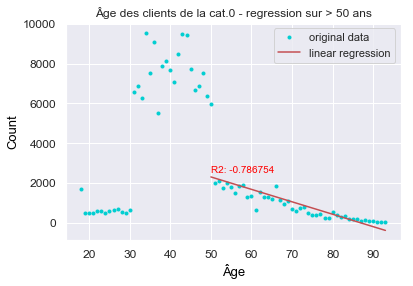

In [48]:
# Linéarisation sur âge des clients - produit de cat.0

# Observation de la relation entre l'âge des clients et le montant total des achats
X = tab2['age']
Y = tab2['cat.0']

X2 = tab2[tab2['age'] >= 50]['age']
Y2 = tab2[tab2['age'] >= 50]['cat.0']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# Plot
plt.plot(X, Y, '.', label='original data', color='darkturquoise')
plt.plot(X2, intercept + slope*X2, 'r', label='linear regression')

# Plot settings
plt.title('Âge des clients de la cat.0 - regression sur > 50 ans')
plt.text(50,2500,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Âge', color='black', size=13)
plt.xticks(size=12)
plt.ylabel('Count', color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/lineaire_age_cat.0_2.png')
plt.show()

<div class="alert alert-block alert-info">
    
**La relation linéaire n'est pas concluante.**

- R2 = 44.5 % : le modèle linéaire est peu représentatif des données.
- On distingue 3 zones : < 30 ans, 30-50 ans et > 50 ans.

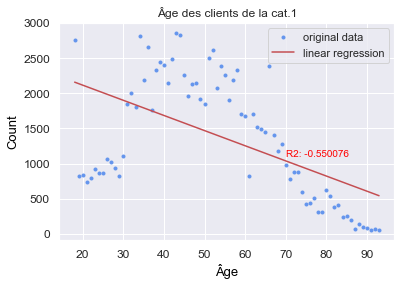

In [42]:
# Linéarisation sur âge des clients - produit de cat.1

# Observation de la relation entre l'âge des clients et le montant total des achats
X = tab2['age']
Y = tab2['cat.1']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X, Y)

# Plot
plt.plot(X, Y, '.', label='original data', color='cornflowerblue')
plt.plot(X, intercept + slope*X, 'r', label='linear regression')

# Plot settings
plt.title('Âge des clients de la cat.1')
plt.text(70,1100,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Âge', color='black', size=13)
plt.xticks(size=12)
plt.ylabel('Count', color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/lineaire_age_cat.1.png')
plt.show()

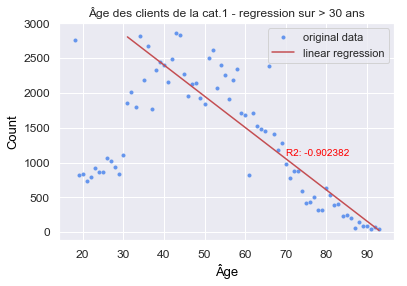

In [49]:
# Linéarisation sur âge des clients > 30 ans - produit de cat.1

# Observation de la relation entre l'âge des clients et le montant total des achats
X = tab2['age']
Y = tab2['cat.1']

X2 = tab2[tab2['age'] > 30]['age']
Y2 = tab2[tab2['age'] > 30]['cat.1']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# Plot
plt.plot(X, Y, '.', label='original data', color='cornflowerblue')
plt.plot(X2, intercept + slope*X2, 'r', label='linear regression')

# Plot settings
plt.title('Âge des clients de la cat.1 - regression sur > 30 ans')
plt.text(70,1100,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Âge', color='black', size=13)
plt.xticks(size=12)
plt.ylabel('Count', color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/lineaire_age_cat.1_2.png')
plt.show()

<div class="alert alert-block alert-info">
    
**La relation linéaire n'est pas concluante.**

- R2 = 55 % : le modèle linéaire est peu représentatif des données.
- On distingue 2 zones : < 30 ans et > 30 ans. Eventuellement une 3ème zone entre 30 et 50 ans.

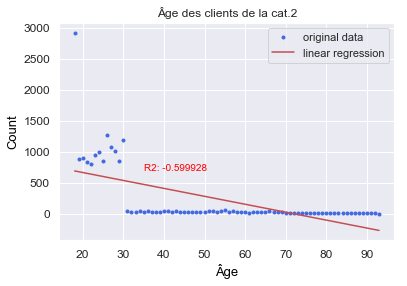

In [40]:
# Linéarisation sur âge des clients - produit de cat.2

# Observation de la relation entre l'âge des clients et le montant total des achats
X = tab2['age']
Y = tab2['cat.2']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X, Y)

# Plot
plt.plot(X, Y, '.', label='original data', color='royalblue')
plt.plot(X, intercept + slope*X, 'r', label='linear regression')

# Plot settings
plt.title('Âge des clients de la cat.2')
plt.text(35,700,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Âge', color='black', size=13)
plt.xticks(size=12)
plt.ylabel('Count', color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/lineaire_age_cat.2.png')
plt.show()

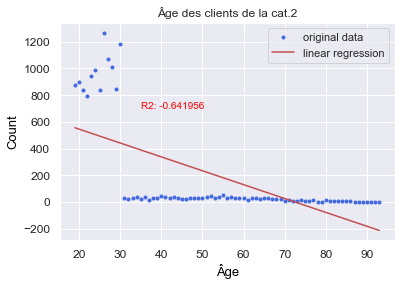

In [50]:
# Linéarisation sur âge des clients sans outliers à 18 ans - produit de cat.2

# Observation de la relation entre l'âge des clients et le montant total des achats
X = tab2[tab2['age'] > 18]['age']
Y = tab2[tab2['age'] > 18]['cat.2']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X, Y)

# Plot
plt.plot(X, Y, '.', label='original data', color='royalblue')
plt.plot(X, intercept + slope*X, 'r', label='linear regression')

# Plot settings
plt.title('Âge des clients de la cat.2')
plt.text(35,700,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Âge', color='black', size=13)
plt.xticks(size=12)
plt.ylabel('Count', color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/lineaire_age_cat.2.png')
plt.show()

<div class="alert alert-block alert-info">
    
**La relation linéaire n'est pas concluante.**

- R2 = 60 % : le modèle linéaire n'est pas représentatif des données.
- R2 = 64% sans outliers (18 ans)
- On voit clairement 2 zones : < 30 ans et > 30 ans.

<div class="alert alert-block alert-info">
    
**La relation linéaire entre l'âge et la catégorie d'achat n'est pas concluante.** 

    
On ne peut néanmoins pas totalement rejeter l'idée qu'il existe une relation entre les 2 variables car on observe des tendances +/- fortes selon le groupe d'âge considérés.


**La relation étant non linéaire et non monotone, on choisit de calculer le rapport de corrélation empirique eta_squared pour étudier la relation entre les 2 variables.**


http://grasland.script.univ-paris-diderot.fr/STAT98/stat98_6/stat98_6.htm#LES%20TYPES%20DE%20RELATIONS%20ENTRE%20DEUX%20CARACTERES

**Rapport de corrélation empirique**

Le rapport de corrélation empirique offre une mesure simple de la liaison la liaison entre une variable qualitative et une variable quantitative.

- Le poids relatif des variances intra et inter est déterminant pour comprendre la structure et la pertinence d’un découpage en groupes : si la variance intra-groupes est nettement plus élevée que la variance inter-groupes, on est dans un cas où les groupes sont en moyenne assez semblables entre eux, mais où chacun d’eux abrite en son sein une énorme variabilité inter-individuelle. Les groupes sont donc vraisemblablement mal définis, et ne correspondent pas à une réalité (physique, biologique, sociale, ...) bien définie.

- À l’inverse, si la variabilité inter-groupes est nettement plus élevée que la variabilité intra, nous sommes alors en présence de groupes bien différenciés les uns des autres et bien homogènes en leur sein : le découpage en groupes est pertinent et correspond à une réalité concrète.

      - L’idée du rapport de corrélation est tout simplement de mesurer le poids de la contribution de la variance intergroupes dans la variance totale (ce qui revient donc à mesurer le poids relatif de la variance inter et de la variance intra)


            - Variance Inter = (sum(effectifs * (moyennes - mean(X))^2))/length(X)

            - Variance totale = (sum((X - mean(X))^2)/length(X))

            - R2 (Coeff. corr) = Var. Inter / Var. Tot


http://www.pacea.u-bordeaux1.fr/IMG/pdf/rapport_correl.pdf

In [33]:
# Calcul du coeff. de correlation empirique : eta_squared

X = df["categ"] # qualitative
Y = df['age'] # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y]) #somme des carrés totaux : exprime la variabilité totale des observations
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes]) # variabilite intergroupe 

    return SCE/SCT
    
eta_squared(X,Y)

0.11279029932310022

<div class="alert alert-block alert-info">

**Interprétation de eta_squared (1 facteur) :**

- <= 0.04 ~ faible
- 0.04 < n2 < 0.36 ~ modéré
- supérieur 0.36 ~ fort

https://www.ibm.com/support/knowledgecenter/en/SS4QC9/com.ibm.solutions.wa_an_overview.2.0.0.doc/etasquared.html
    
    
- Le coefficient de corrélation empirique entre nos variables âge et catégorie d'achat est de valeur moyenne.
- Environ 12% de la variance est associée à la catégorie d'achat.

**L'âge des clients influence moyennement la catégorie d'achats considérée.**

### Genre vs catégorie d'achat

#### Statistiques Descriptives

In [60]:
# Genre de la clientèle de chaque groupe 

sex = pd.DataFrame({'categorie': ['012',0,1,2],
'n total':[len(df.sex),len(df0.sex), len(df1.sex),len(df2.sex)],
'n unique':[len(df.id_client.unique()),len(df0.id_client.unique()),len(df1.id_client.unique()),
            len(df2.id_client.unique())], 
'Mode tot':[df.sex.mode()[0], df0.sex.mode()[0],df1.sex.mode()[0], df2.sex.mode()[0]],
'Mode unique':[df.drop_duplicates(subset='id_client').sex.mode()[0],df0.drop_duplicates(subset='id_client').sex.mode()[0],
            df1.drop_duplicates(subset='id_client').sex.mode()[0],df2.drop_duplicates(subset='id_client').sex.mode()[0]]})

sex

,categorie,n total,n unique,Mode tot,Mode unique
0,012,313651,8596,f,f
1,0,195270,7878,f,f
2,1,102625,8449,f,f
3,2,15756,3270,f,f


<div class="alert alert-block alert-info">

- Il y a plus de femmes dans la clientèle.

#### Distribution

In [61]:
# Tableau de contingence: âge / cat.

tab4 = pd.crosstab(df.sex, df.categ,margins=True, margins_name="Total")

tab4.head()

categ,0,1,2,Total
sex,,,,
f,101206,53774,8122,163102
m,94064,48851,7634,150549
Total,195270,102625,15756,313651


**On observe pour chaque vente la proportion d'hommes et de femmes dans chaque cat.**

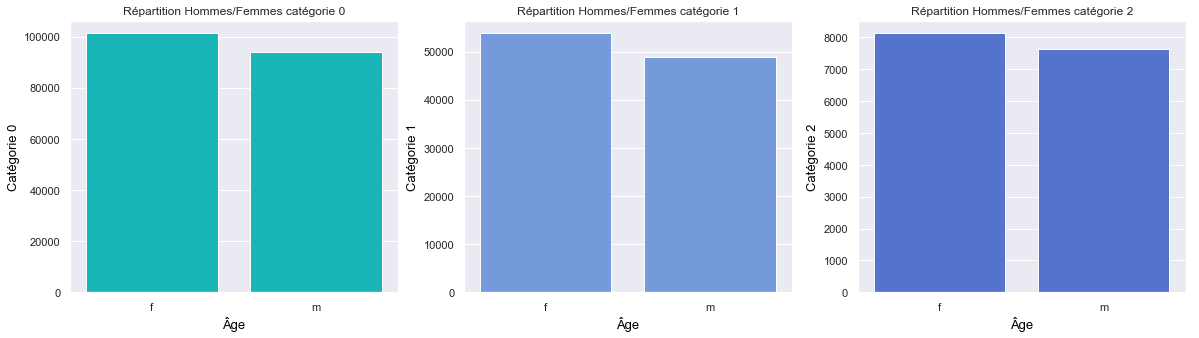

In [62]:
# Distribution du genre des clients par cat. (4 plots)

#Data
tab_sex = pd.crosstab(df.sex, df.categ).reset_index()
tab_sex = tab_sex.rename(index=str, columns={0: "cat.0",1: "cat.1",2: "cat.2" })

#Figure
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))

# Plot1
sns.barplot(tab_sex['sex'] ,y=tab_sex['cat.0'],data=tab_sex,ax=ax1, color="darkturquoise")
ax1.set_ylabel('Catégorie 0', color='black', size=13)
ax1.set_xlabel('Âge', color='black', size=13)
ax1.set_title('Répartition Hommes/Femmes catégorie 0')

# Plot2
sns.barplot(tab_sex['sex'] ,y=tab_sex['cat.1'],data=tab_sex, ax=ax2, color="cornflowerblue")
ax2.set_ylabel('Catégorie 1', color='black', size=13)
ax2.set_xlabel('Âge', color='black', size=13)
ax2.set_title('Répartition Hommes/Femmes catégorie 1')

# Plot3
sns.barplot(tab_sex['sex'] ,y=tab_sex['cat.2'],data=tab_sex,ax=ax3, color="royalblue")
ax3.set_ylabel('Catégorie 2', color='black', size=13)
ax3.set_xlabel('Âge', color='black', size=13)
ax3.set_title('Répartition Hommes/Femmes catégorie 2')

# BackUp
plt.savefig('reports/Clients/hist_sex_cat.png')
plt.show()

<div class="alert alert-block alert-info">

Illustrations des observations vues dans Stats. Descriptives.

**Les différences H/F sont-elles significatives ?**

#### Khi2

'sex' et 'categ' sont 2 variables qualitatives : On utilise donc le **test du Chi-2** pour évaluer si les 2 variables sont corrélées.

- Hypothèse nulle (H0) : la catégorie de produits achetés n'est pas liée au sexe des clients
- Hypothèse alternative (H1) : la catégorie de produits achetés est dépendant du sexe des clients

- Seuil de tolérance α : 5% sous l'hypothèse nulle

In [63]:
# Effectifs observés en %

tab3 = pd.crosstab(df.sex, df.categ,normalize=True,margins=True, margins_name="Total")
tab3

categ,0,1,2,Total
sex,,,,
f,0.322671,0.171445,0.025895,0.520011
m,0.299900,0.155750,0.024339,0.479989
Total,0.622571,0.327195,0.050234,1.000000


In [69]:
# Tableau du Khi2  
# Calcul des effectifs théoriques

tab4['ratio'] = tab3['Total']

tab4['0_th'] = round(tab4[0].iloc[2]*tab4['ratio'])
tab4['1_th'] = round(tab4[1].iloc[2]*tab4['ratio'])
tab4['2_th'] = round(tab4[2].iloc[2]*tab4['ratio'])

# Calcul du Khi2 de contingence
tab4['khi_0'] = (tab4[0]-tab4['0_th'])**2/tab4['0_th']
tab4['khi_1'] = (tab4[1]-tab4['1_th'])**2/tab4['1_th']
tab4['khi_2'] = (tab4[2]-tab4['2_th'])**2/tab4['2_th']

tab4

categ,0,1,2,Total,ratio,0_th,1_th,2_th,khi_0,khi_1,khi_2
sex,,,,,,,,,,,
f,101206,53774,8122,163102,0.520011,101543.0,53366.0,8193.0,1.118433,3.119289,0.615281
m,94064,48851,7634,150549,0.479989,93727.0,49259.0,7563.0,1.211700,3.379362,0.666534
Total,195270,102625,15756,313651,1.000000,195270.0,102625.0,15756.0,0.000000,0.000000,0.000000


In [65]:
# Method 1 - Python Khi2

temp = np.array(pd.crosstab(df.categ,df.sex)) #On cree un array avec pour chaque cat. les valeurs obs f/m

chi2, p, dof,ex = ss.chi2_contingency(temp) #calcul du chi2 : somme de tous les khi2 (0,1,2)

chi2,p,dof

(10.110865513726571, 0.006374607510181767, 2)

**Interprétations**

- Si khi2 = 0, il y a indépendance entre les deux variables. 
- Si khi2 est petit, les effectifs observés sont presque identiques aux effectifs théoriques. Les deux variables sont peu liées entre elles. 
- Si khi2 est grand, les effectifs observés sont différents des effectifs théoriques. Les 2 variables sont corrélées.


***Seuil dans la table du Khi 2***

Avec dof = 2 et alpha = 0,05 : seuil = 5.99

https://www.apprendre-en-ligne.net/random/tablekhi2.html

<div class="alert alert-block alert-info">
    
**On rejette l'hypothese nulle : la catégorie de produits achetés est corrélée au genre du client.**

- khi2 = 10,11 >> 5,99 
- p-value << seuil de 5%. 

<div>

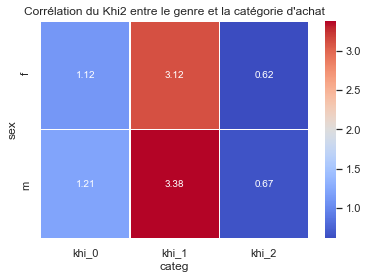

In [66]:
# Corrélation entre le genre et la catégorie d'achat 

heat = tab4[['khi_0','khi_1','khi_2']].copy()
heat = heat.drop(heat.index[len(tab4)-1])

sns.heatmap(heat, linewidth = .5, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Corrélation du Khi2 entre le genre et la catégorie d\'achat')
plt.savefig('reports/Clients/heatmap_genre_cat.png')

<div class="alert alert-block alert-info">

On visualise sur la heatmap la corrélation entre le genre et la catégorie. 

### Âge vs montant total des achats

#### Statistique Descriptive

In [71]:
# Statistique Descriptive 

df_corr = df.groupby(['age']).sum().reset_index()[['age', 'price']]

temp = pd.DataFrame({'categorie': ['age', 'price'],
'Mean': [df_corr.age.mean(),df_corr.price.mean()],
'Mode':[df_corr.age.mode()[0],df_corr.price.mode()[0]],
'Variance': [df_corr.age.var(ddof=0),df_corr.price.var(ddof=0)],
'StDev':[df_corr.age.std(ddof=0),df_corr.price.std(ddof=0)],          
'Skewness': [df_corr.age.skew(),df_corr.price.skew()], 
'Kurtosis': [df_corr.age.kurtosis(),df_corr.price.kurtosis()] })

temp['Limite Out. 2'] = 2 * temp['StDev'] + temp['Mean']
temp['Limite Out. 3'] = 3 * temp['StDev'] + temp['Mean']

temp

,categorie,Mean,Mode,Variance,StDev,Skewness,Kurtosis,Limite Out. 2,Limite Out. 3
0,age,55.500000,18.00,4.812500e+02,21.937411,0.000000,-1.200000,99.374822,121.312233
1,price,70576.769825,1300.03,3.011492e+09,54877.065452,0.942842,2.001932,180330.900728,235207.966180


<div class="alert alert-block alert-info">
    
**Pour le montant total des achats :**
    
- Le montant total le plus fréquent est 1300€.
- On observe une asymétrie positive et un aplatissement (par rapport à une distribution normale) correspondant à un large intervalle de valeurs et des valeurs positives extrêmes.
- On pourrait choisir de traiter les valeurs au-dessus de 180 331 € (2 fois SD + Mean) comme des Outliers.

#### Distribution

C:\Users\Aurelie\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


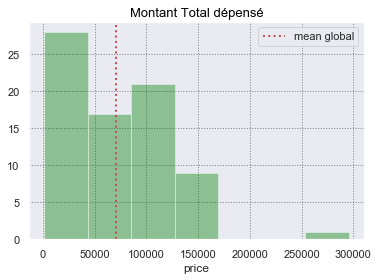

In [72]:
# Distribution du montant total des achats des clients

fig,ax1 = plt.subplots()
ax1.grid(color='grey', linestyle='dotted')

# Plot
x = pd.Series(df_corr.price)
sns.distplot(x, color="green",kde=False,ax=ax1)
ax1.set_title('Montant Total dépensé', color='black', size=13)
ax1.axvline(df_corr.price.mean(), color='r', linestyle='dotted',linewidth=2, label = 'mean global')

plt.legend()

# BackUp
plt.savefig('reports/Clients/hist_age_prix_global.png')

<div class="alert alert-block alert-info">

Une valeur extrême au-delà de 250 000€. 

*Les groupes d'âges sont issus des observations faîtes dans la partie corrélation*

In [73]:
# Creation de groupe d'âges : <= 40 ans et > 40 ans

gp1 = df_corr[df_corr.age <= 40]

gp3 = df_corr[df_corr.age > 40]

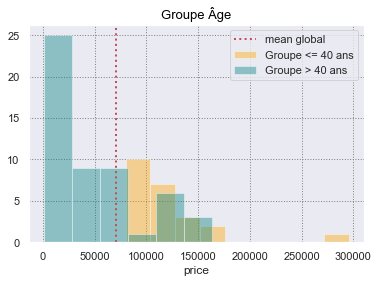

In [75]:
# Distribution du montant total des achats des clients par groupe d'âges

fig,ax1 = plt.subplots()
ax1.grid(color='grey', linestyle='dotted')

# Plot
x = pd.Series(gp1.price)
sns.distplot(x, color="orange",kde=False,ax=ax1,label = 'Groupe <= 40 ans')
ax1.set_title('Groupe Âge', color='black', size=13)
ax1.axvline(df_corr.price.mean(), color='r', linestyle='dotted',linewidth=2, label = 'mean global')

x3 = pd.Series(gp3.price)
sns.distplot(x3, color="teal",kde=False,ax=ax1, label = 'Groupe > 40 ans')

plt.legend()

# BackUp
plt.savefig('reports/Clients/hist_age_prix.png')

<div class="alert alert-block alert-info">

**Il semble qu'il y ait un effet de l'âge sur le montant total des clients.**

- Le groupe des > 40 ans achètent pour des montants totaux inférieurs aux clients de <= 40 ans.
- On visualise 1 outliers, il est visiblement en marge du reste (> 250 000).
- La présence de ce outliers décale la moyenne du groupe vers les valeurs hautes.

#### Corrélation

**Linéaire**

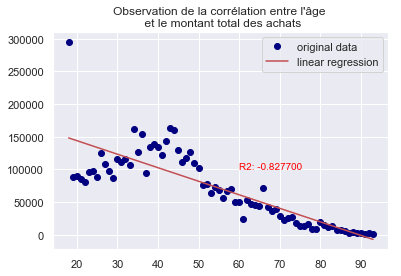

In [47]:
# Observation de la relation entre l'âge des clients et le montant total des achats

X = df_corr['age']
Y = df_corr['price']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X, Y)

# Plot
plt.plot(X, Y, 'o', label='original data', color='navy')
plt.plot(X, intercept + slope*X, 'r', label='linear regression')


# Plot settings
plt.title('Observation de la corrélation entre l\'âge \n et le montant total des achats')
plt.text(60,100000,"R2: %f " % (r_value), color = 'red')
plt.legend()

# Plot BackUp
plt.savefig('reports/Clients/lineaire_age_montant.png')

In [79]:
ss.pearsonr(X,Y)

(-0.8277001073524537, 3.0090034500146036e-20)

In [80]:
ss.spearmanr(X, Y, axis=0)

SpearmanrResult(correlation=-0.873192071086808, pvalue=8.412924890580328e-25)

La significativité du coefficient de Pearson > significativité du coefficient de Spearman : Le coeff. de Pearson est surévalué par la présence de valeurs atypiques.

<div class="alert alert-block alert-info">

**Le modèle actuel est representatif de 82,8% des données.** 

Cette linéarisation pourrait être améliorée:
- en traitant le outlier.

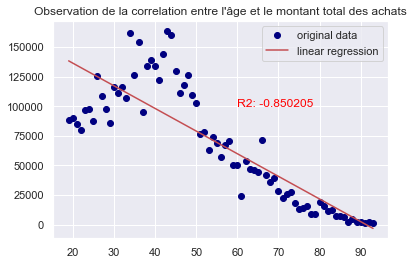

In [81]:
# Même regression sans 1 outliers

temp = df_corr[(df_corr.price < 180331)] # Sans des outliers du dataset

# Data
X = temp['age']
Y = temp['price']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X, Y)

# Plot
plt.plot(X, Y, 'o', label='original data',color='navy')
plt.plot(X, intercept + slope*X, 'r', label='linear regression')

# Plot settings
plt.title('Observation de la correlation entre l\'âge et le montant total des achats')
plt.text(60,100000,"R2: %f " % (r_value), color = 'red')
plt.legend()

# Plot BackUp
plt.savefig('reports/Clients/lineaire_age_montant2.png')

In [82]:
ss.pearsonr(X,Y)

(-0.8502052458670115, 4.968518944891645e-22)

In [83]:
ss.spearmanr(X, Y, axis=0)

SpearmanrResult(correlation=-0.8680512091038406, pvalue=6.743097747844149e-24)

Même observations sur les coefficients.
Sans les 3 valeurs extrêmes on améliore notre coefficient de Pearson. 

<div class="alert alert-block alert-info">

**Si on considère l'ensemble des données :**
La liaison n'est pas monotone. 

- Le coefficient de Pearson n'est donc pas le plus adapté pour traduire l'intensité de la liaison entre nos 2 variables. 
- Le coefficient de Spearman nous indique cependant la présence d'une liaison entre nos 2 variables.

**On peut découper nos données en groupe d'âges ayant une liaison monotone : <= 40 ans et > 40 ans.**

- La portion > 40 ans présente une forte corrélation linéaire entre l'âge et la montant total des achats. 
- La portion <= 40 ans est plus diffuse du à des valeurs extrêmes en marge de la moyenne du groupe. Elle présente néanmoins une relation linéaire.

Eventuellement, on pourrait découper en 3 zones : <30, 30-50, >50. Mais le résultat de linéarisation est moins probant sauf sur groupe > 50 ans.

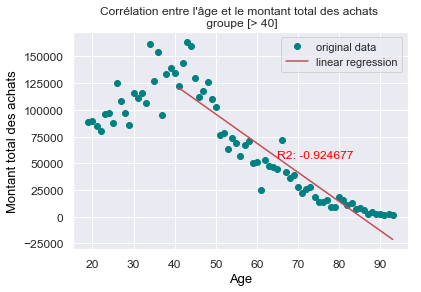

In [84]:
# Linéarisation sur groupe [> 40]

temp = df_corr[(df_corr.price < 180331)] # Suppression des outliers du dataset

# Observation de la relation entre l'âge des clients et le montant total des achats
X = temp['age']
Y = temp['price']

X2 = temp[temp.age > 40]['age']
Y2 = temp[temp.age > 40]['price']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# Plot
plt.plot(X, Y, 'o', label='original data', color='teal')
plt.plot(X2, intercept + slope*X2, 'r', label='linear regression')

# Plot settings
plt.title('Corrélation entre l\'âge et le montant total des achats \n groupe [> 40]')
plt.text(65,55000,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Age', color='black', size=13)
plt.xticks(size=12)
plt.ylabel("Montant total des achats", color='black', size=13)
plt.yticks(size=12)

# Plot BackUp
plt.savefig('reports/Clients/scatterplot_age_price_gp3.png')

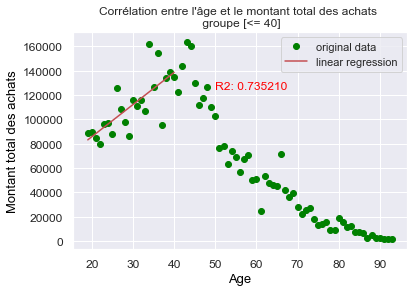

In [85]:
# Linéarisation sur groupe [<= 40]

temp = df_corr[(df_corr.price < 180331)] # Suppression des outliers du dataset

# Observation de la relation entre l'âge des clients et le montant total des achats
X = temp['age']
Y = temp['price']

X2 = temp[temp.age <= 40]['age']
Y2 = temp[temp.age <= 40]['price']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# Plot
plt.plot(X, Y, 'o', label='original data', color='green')
plt.plot(X2, intercept + slope*X2, 'r', label='linear regression')

# Plot settings
plt.title('Corrélation entre l\'âge et le montant total des achats \n groupe [<= 40]')
plt.text(50,125000,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Age', color='black', size=13)
plt.xticks(size=12)
plt.ylabel("Montant total des achats", color='black', size=13)
plt.yticks(size=12)

# Plot BackUp
plt.savefig('reports/Clients/scatterplot_age_price_gp1.png')

<div class="alert alert-block alert-info">

**Il existe une relation linéaire entre l'âge des clients et le montant total des achats. Cette relation doit être considérée par groupe d'âges** 

- Jusqu'à 40 ans : relation linéaire positive = Plus les clients sont âgés **plus** le montant total de leurs achats est élevé.

- Après 40 ans : relation linéaire negative = Plus les clients sont âgés **moins** le montant total de leurs achats est élevé.

Autres découpages possibles

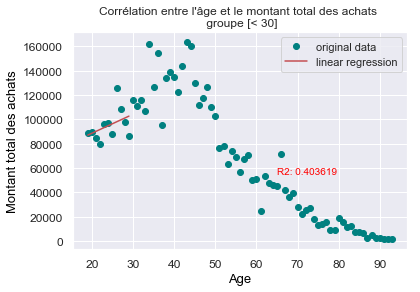

In [69]:
# Linéarisation sur groupe [< 30]

temp = df_corr[(df_corr.price < 180331)] # Suppression des outliers du dataset

# Observation de la relation entre l'âge des clients et le montant total des achats
X = temp['age']
Y = temp['price']

X2 = temp[temp.age < 30]['age']
Y2 = temp[temp.age < 30]['price']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# Plot
plt.plot(X, Y, 'o', label='original data', color='teal')
plt.plot(X2, intercept + slope*X2, 'r', label='linear regression')

# Plot settings
plt.title('Corrélation entre l\'âge et le montant total des achats \n groupe [< 30]')
plt.text(65,55000,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Age', color='black', size=13)
plt.xticks(size=12)
plt.ylabel("Montant total des achats", color='black', size=13)
plt.yticks(size=12)

# Plot BackUp
plt.savefig('reports/Clients/scatterplot_age_price_gp1_jeune.png')

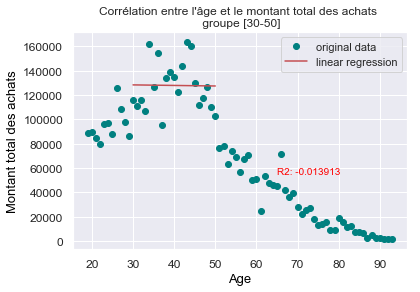

In [72]:
# Linéarisation sur groupe [30-50]

temp = df_corr[(df_corr.price < 180331)] # Suppression des outliers du dataset

# Observation de la relation entre l'âge des clients et le montant total des achats
X = temp['age']
Y = temp['price']

X2 = temp[(temp.age >= 30) & (temp.age <= 50) ]['age']
Y2 = temp[(temp.age >= 30) & (temp.age <= 50)]['price']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# Plot
plt.plot(X, Y, 'o', label='original data', color='teal')
plt.plot(X2, intercept + slope*X2, 'r', label='linear regression')

# Plot settings
plt.title('Corrélation entre l\'âge et le montant total des achats \n groupe [30-50]')
plt.text(65,55000,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Age', color='black', size=13)
plt.xticks(size=12)
plt.ylabel("Montant total des achats", color='black', size=13)
plt.yticks(size=12)

# Plot BackUp
plt.savefig('reports/Clients/scatterplot_age_price_gp2_medium.png')

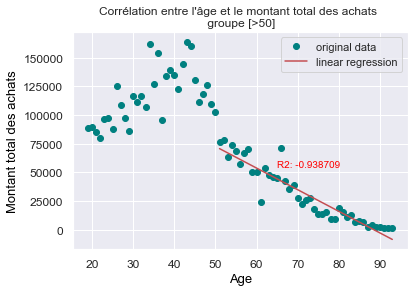

In [70]:
# Linéarisation sur groupe [> 50]

temp = df_corr[(df_corr.price < 180331)] # Suppression des outliers du dataset

# Observation de la relation entre l'âge des clients et le montant total des achats
X = temp['age']
Y = temp['price']

X2 = temp[temp.age >50]['age']
Y2 = temp[temp.age >50]['price']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# Plot
plt.plot(X, Y, 'o', label='original data', color='teal')
plt.plot(X2, intercept + slope*X2, 'r', label='linear regression')

# Plot settings
plt.title('Corrélation entre l\'âge et le montant total des achats \n groupe [>50]')
plt.text(65,55000,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Age', color='black', size=13)
plt.xticks(size=12)
plt.ylabel("Montant total des achats", color='black', size=13)
plt.yticks(size=12)

# Plot BackUp
plt.savefig('reports/Clients/scatterplot_age_price_gp3_vieux.png')

#### Courbe de Lorenz & Coeff de Gini

- La courbe de concentration de Lorenz est un moyen de représenter la fonction de répartition d'une variable aléatoire X. Elle est notamment utilisée en économie pour mesurer les inégalités de possession de richesse, on l'utilisera ici pour évaluer les inégalités en termes de montant total des achats. 

- Elle est fabriquée de la façon suivante. Soit x une valeur prise par X. On note F(x) la proportion de la population pour laquelle X<x (F est donc la fonction de répartition de X). On note FQ(x) la proportion du bien possédé par ces individus par rapport au bien total. Alors la courbe de Lorenz est la courbe joignant tous les points (F(x),FQ(x)).

http://www.bibmath.net/dico/index.php?action=affiche&quoi=./l/lorenzcourbe.html

In [76]:
# Prix total pour chaque panier - classement par ordre croissant de montant

temp = df.groupby(['id_session','age']).sum()[['price']].reset_index().sort_values(by='price')

temp.head()

,id_session,age,price
98129,107417,63,0.62
32179,34456,81,0.62
96213,104606,38,0.62
38549,41352,63,0.62
78056,83637,57,0.66


In [77]:
# Data
X = np.array(temp.price) 
X_lorenz = X.cumsum() / X.sum() # conversion des data en proportions cumulées
X_lorenz = np.insert(X_lorenz, 0, 0) #ajout du point origine de coordonnées (0,0)

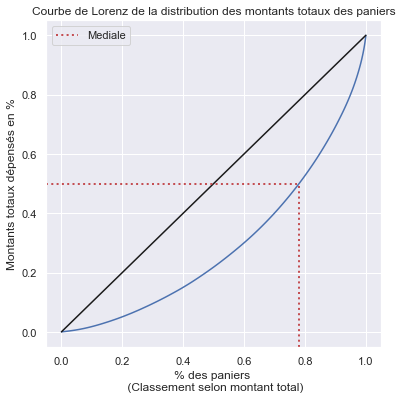

In [78]:
# Courbe de Lorenz
fig, ax = plt.subplots(figsize=[6,6])

# Lorenz Plot
plt.plot(np.linspace(0,1,len(X_lorenz)),X_lorenz,drawstyle='steps-post')

# Equality plot
ax.plot([0,1], [0,1], color='k')

# Mediale 
ax.axvline(x=0.78,ymin=0, ymax=0.5, color='r', linestyle='dotted',linewidth=2, label = 'Mediale')
ax.axhline(y=0.5, xmin=0, xmax=0.75 , color='r', linestyle='dotted',linewidth=2)

# Plot settings
plt.title('Courbe de Lorenz de la distribution des montants totaux des paniers')
plt.xlabel('% des paniers \n (Classement selon montant total)')
plt.ylabel('Montants totaux dépensés en %')
plt.legend()

# BackUp
plt.savefig('reports/Clients/Lorenz_panier.png')

<div class="alert alert-block alert-info">

- 22% des paniers avec les prix les plus élevés concentrent 50% des montant totaux dépensés.

**Indice et coefficient de Gini**

Considérons la surface en forme de lentille comprise entre la diagonale d'égalité parfaite et la courbe de Lorenz, et soit S son aire. Plus les inégalités sont importantes dans la population considérée, plus la courbe de Lorenz est "creuse" et proche de l'axe des x, plus le rapport G entre l'aire S et l'aire du triangle rectangle sous la diagonale (0,0) - (100,0) - (100,100) est important.
 

Le rapport G, appelé indice de Gini, est donc une mesure des inégalités. Sa valeur est comprise entre 0 et 1. Plus G est grand, plus les inégalités entre personnes de la population considérée sont importantes. On peut donc comparer les inégalités des distributions de deux populations en comparant leurs indices de Gini G.
 

On exprime parfois l'indice de Gini en pour-cent en parlant de coefficient de Gini. C'est ainsi qu'un indice de Gini de 0.75 équivaut à un coefficient de Gini de 75.


http://www.danielmartin.eu/Cours/Gini.htm

Au lieu de calculer directement l’aire de concentration, nous pouvons exploiter le fait que cette aire représente la différence entre l’aire de concentration maximale et l’aire sous la courbe de Lorenz.

In [79]:
# Calcul du coefficient de Gini

aire_ss_courbe = X_lorenz[:-1].sum()/len(X_lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.41927048075754814

<div class="alert alert-block alert-info">

On constate visuellement sur la courbe de Lorenz que l'écart entre la droite d'égalité et la courbe est relativement important; traduisant **une inégalité de répartition dans les montants des paniers.** 

Ceci est corroboré par un indice de Gini de valeur moyenne : **il y a inégalité dans la répartition des montants des paniers, cette inégalité est moyennement concentrée.**

**Observations sur groupe d'âge**

In [80]:
# Aggrégation par panier

temp2 = df.groupby(['id_session','age']).sum()[['price']].reset_index().sort_values(by='price')
temp2.head()

,id_session,age,price
98129,107417,63,0.62
32179,34456,81,0.62
96213,104606,38,0.62
38549,41352,63,0.62
78056,83637,57,0.66


In [81]:
# Prix du panier par groupement d'âges - classement par prix croissants

gp1 = temp2[(temp2['age']<=40)][['age','price']].sort_values(by='price') 
gp3 = temp2[(temp2['age']> 40)][['age','price']].sort_values(by='price')

gp1.head()

,age,price
96213,38,0.62
52951,35,0.81
140885,35,0.97
135131,31,0.99
39863,32,0.99


In [82]:
# Data
X1 = np.array(gp1.price)
X3 = np.array(gp3.price)

# Conversion en proportions 
X1_lorenz = X1.cumsum() / X1.sum()

X3_lorenz = X3.cumsum() / X3.sum()

# Ajout du point origine de coordonnées (0,0)
X1_lorenz = np.insert(X1_lorenz, 0, 0) 

X3_lorenz = np.insert(X3_lorenz, 0, 0)

In [83]:
# Calcul du coefficient de Gini - groupe <= 40 ans

aire_ss_courbe = X1_lorenz[:-1].sum()/len(X1_lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini1 = 2*S
gini1

0.4212552216661887

In [84]:
# Calcul du coefficient de Gini - groupe > 40 ans

aire_ss_courbe = X3_lorenz[:-1].sum()/len(X3_lorenz) # aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire
S = 0.5 - aire_ss_courbe # aire entre la 1e bissectrice et la courbe de Lorenz
gini3 = 2*S
gini3

0.38258145934072174

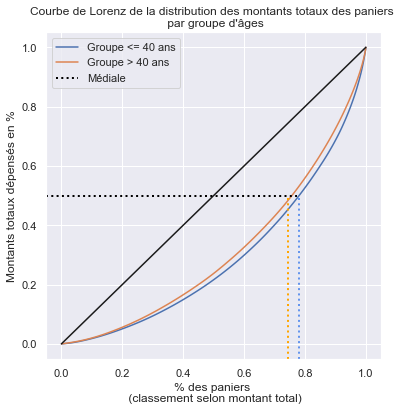

In [85]:
# Courbe de Lorenz
fig, ax = plt.subplots(figsize=[6,6])

# Lorenz Plot

plt1 = plt.plot(np.linspace(0,1,len(X1_lorenz)),X1_lorenz,drawstyle='steps-post',label='Groupe <= 40 ans')

plt3 = plt.plot(np.linspace(0,1,len(X3_lorenz)),X3_lorenz,drawstyle='steps-post',label='Groupe > 40 ans')

# Equality plot
ax.plot([0,1], [0,1], color='k')

# Mediale
ax.axhline(y=0.5, xmin=0, xmax=0.75 , color='black', linestyle='dotted',linewidth=2,label='Médiale') #ligne horizontale

ax.axvline(x=0.78,ymin=0, ymax=0.5, color='cornflowerblue', linestyle='dotted',linewidth=2)

ax.axvline(x=0.745, ymin=0, ymax=0.5, color='orange', linestyle='dotted',linewidth=2) 


# Plot settings
plt.title('Courbe de Lorenz de la distribution des montants totaux des paniers \n par groupe d\'âges')
plt.xlabel('% des paniers \n (classement selon montant total)')
plt.ylabel('Montants totaux dépensés en %')
plt.legend()

plt.savefig('reports/Clients/lorenz_gpe.png')

<div class="alert alert-block alert-info">

On constate que **l'inégalité de répartition des montants totaux des paniers varie peu selon le groupe d'âge des clients.**

La répartition des montants des paniers est quasiment identique quelque soit le groupe considéré.
Le groupe des moins de 40 ans présente une répartition très légèrement moins inégalitaire.

Ces observations sont corroborées par des coefficients de Gini très proches entre les groupes: 0.42, 0.38 respectivement pour les clients jusqu'à 40 ans et de plus de 40 ans. 

### Âge vs fréquence d'achat mensuelle

#### Statistique Descriptive

In [86]:
# Aggrégation sur les âges des clients et les mois

temp = df.groupby(['age','M']).sum().reset_index()[['age','M','session']]

# Création d'une colonne fréquence : nb session pour un âge donné / nb sessions total
temp['freq'] = temp['session']*100 / (temp['session'].sum())

temp.sort_values(by=['age','M']).head(10)

,age,M,session,freq
0,18,1,693,0.220946
1,18,2,728,0.232105
2,18,3,596,0.190020
3,18,4,581,0.185238
4,18,5,646,0.205961
5,18,6,645,0.205643
6,18,7,681,0.217120
7,18,8,652,0.207874
8,18,9,521,0.166108
9,18,10,378,0.120516


In [87]:
# Moyenne mensuelle du nombre d'achats par âge - classement par ordre decroissant

temp2 = temp.groupby('age').mean().reset_index()[['age','session']]

temp2['freq'] = temp2['session'] * 100 / temp2['session'].sum()

temp2.sort_values(by='session', ascending=False).head(10)

,age,session,freq
25,43,1035.333333,3.961091
16,34,1034.000000,3.955989
26,44,1023.250000,3.914861
18,36,985.333333,3.769795
24,42,918.750000,3.515053
21,39,886.333333,3.391030
20,38,853.250000,3.264456
22,40,842.416667,3.223009
27,45,835.000000,3.194634
17,35,811.250000,3.103768


In [88]:
#Verif freq: (supposée = 100%)

temp2['freq'].sum()

99.99999999999999

In [89]:
# Statistique Descriptive 

tp = pd.DataFrame({'categorie': ['session'],
'Mean': [temp2.session.mean()],
'Mode':[temp2.session.mode()[0]],
'Variance': [temp2.session.var(ddof=0)],
'StDev':[temp2.session.std(ddof=0)],          
'Skewness': [temp2.session.skew()], 
'Kurtosis': [temp2.session.kurtosis()] })

tp['Limite Out. 2'] = 2 * tp['StDev'] + tp['Mean']

tp

,categorie,Mean,Mode,Variance,StDev,Skewness,Kurtosis,Limite Out. 2
0,session,343.91557,7.0,96358.296508,310.416328,0.883678,-0.584611,964.748226


<div class="alert alert-block alert-info">

- Le nombre d'achats mensuels moyens est de 344 ce qui représente 11,3 achats / jour.

- L'asymétrie et l'aplatissement ne sont pas prononcés et indiquent une tendance Gaussienne de la distribution.

#### Distribution

*Les groupes d'âges sont issus des observations faîtes dans la partie corrélation*

In [91]:
# Creation de groupe d'âges : <= 40 ans et > 40 ans

gp1 = temp2[temp2.age <= 40]

gp3 = temp2[temp2.age > 40]

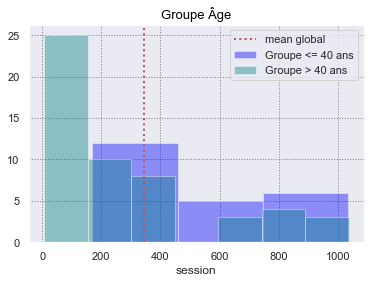

In [92]:
# Nombre de sessions d'achats par groupe d'âges

fig,ax1 = plt.subplots()
ax1.grid(color='grey', linestyle='dotted')

# Plot
x = pd.Series(gp1.session)
sns.distplot(x, color="blue",kde=False,ax=ax1,label = 'Groupe <= 40 ans')
ax1.set_title('Groupe Âge', color='black', size=13)
ax1.axvline(temp2.session.mean(), color='r', linestyle='dotted',linewidth=2, label = 'mean global')

x3 = pd.Series(gp3.session)
sns.distplot(x3, color="teal",kde=False,ax=ax1, label = 'Groupe > 40 ans')

plt.legend()

# BackUp
plt.savefig('reports/Clients/hist_age_freq.png')

<div class="alert alert-block alert-info">

Les plus de 40 ans semblent acheter moins souvent.

#### Corrélation

**Linéaire**

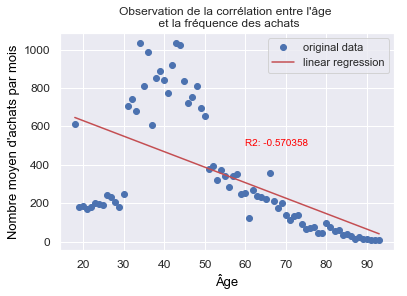

In [93]:
# Scatter plot : Âge vs Freq. Achats

# Observation de la relation entre l'âge des clients et le montant total des achats
X = temp2['age']
Y = temp2['session']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X, Y)

# Plot
plt.plot(X, Y, 'o', label='original data')
plt.plot(X, intercept + slope*X, 'r', label='linear regression')

# Plot settings
plt.title('Observation de la corrélation entre l\'âge \n et la fréquence des achats')
plt.text(60,500,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Âge', color='black', size=13)
plt.xticks(size=12)
plt.ylabel("Nombre moyen d'achats par mois", color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/scatterplot_age_freq.png')
plt.show()

In [94]:
ss.pearsonr(X, Y)

(-0.5703584540583574, 7.50660720920271e-08)

In [95]:
ss.spearmanr(X, Y, axis=0)

SpearmanrResult(correlation=-0.6732740943267259, pvalue=2.6779028416585716e-11)

La significativité du coefficient de Pearson > significativité du coefficient de Spearman : Le coeff. de Pearson est surévalué par la présence de valeurs atypiques.

<div class="alert alert-block alert-info">

**Le modèle actuel n'est representatif que de 57% des données.** 

**Si on considère l'ensemble des données :**
La liaison n'est pas monotone. 

- Le coefficient de Pearson n'est donc pas le plus adapté pour traduire l'intensité de la liaison entre nos 2 variables. 

- Le coefficient de Spearman nous indique cependant la présence d'une liaison entre nos 2 variables.

**On peut essayer de découper nos données en groupe d'âges ayant une liaison apparente monotone.**

La corrélation pourrait être amélioré en traitant les données par groupe d'âges : <= 40 ans et > 40 ans

**Présence d'un outlier à 18 ans que l'on pourrait sortir de l'analyse pour améliorer le modèle.**

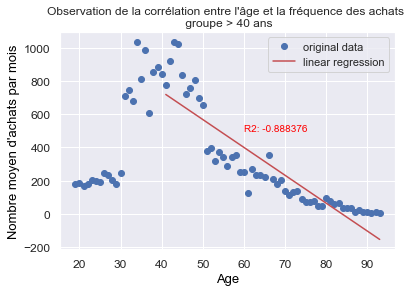

In [96]:
# Linéarisation sur groupe [> 40 ans]

tp = temp2[(temp2.session < 13072) & (temp2.age != 18)]

# Observation de la relation entre l'âge des clients et le montant total des achats
X = tp['age']
Y = tp['session']

X2 = tp[tp.age > 40]['age']
Y2 = tp[tp.age > 40]['session']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# Plot
plt.plot(X, Y, 'o', label='original data')
plt.plot(X2, intercept + slope*X2, 'r', label='linear regression')

# Plot settings
plt.title('Observation de la corrélation entre l\'âge et la fréquence des achats \n groupe > 40 ans')
plt.text(60,500,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Age', color='black', size=13)
plt.xticks(size=12)
plt.ylabel("Nombre moyen d'achats par mois", color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/scatterplot_age_freq_gp3.png')

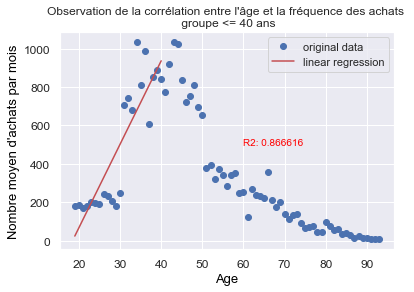

In [97]:
# Linéarisation sur groupe [<= 40 ans]

tp = temp2[(temp2.session < 13072) & (temp2.age != 18)]

# Observation de la relation entre l'âge des clients et le montant total des achats
X = tp['age']
Y = tp['session']

X2 = tp[tp.age <= 40]['age']
Y2 = tp[tp.age <= 40]['session']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# Plot
plt.plot(X, Y, 'o', label='original data')
plt.plot(X2, intercept + slope*X2, 'r', label='linear regression')

# Plot settings
plt.title('Observation de la corrélation entre l\'âge et la fréquence des achats \n groupe <= 40 ans')
plt.text(60,500,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Age', color='black', size=13)
plt.xticks(size=12)
plt.ylabel("Nombre moyen d'achats par mois", color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/scatterplot_age_freq_gp3_bis.png')

- Jusqu'à 40 ans, la relation linéaire entre l'âge et la fréquence d'achat est positive.
- Après 40 ans, la relation linéaire est décroissante.

La corrélation observée entre nos variables âge et fréquence d'achat est comparable à celle observée entre âge et montant total des achats.

- Jusqu'à 40 ans : +0,76 / +0,74 (freq/montant)
- Après 40 ans   : -0,82 / -0,93

<div class="alert alert-block alert-info">

On observe  **une relation linéaire entre l'âge et la fréquence d'achat des clients.** 
Cette relation peut être considérée par groupe d'age :<= 40 et > 40 ans.

- Jusqu'à 40 ans, la relation linéaire est positive. Autrement dit, avant 40 ans : plus les clients sont âgés plus ils achètent souvent.
- Au delà de 40 ans, la relation linéaire est décroissante. Autrement dit, après 40 ans : plus les clients sont âgés moins ils achètent souvent.

On peut affiner cette étude de corrélation en découpant nos données en 3 groupes au lieu de 2 :
- <30 ans, 30-50 ans et > 50 ans.

***Essais sur groupes intermédiaires***

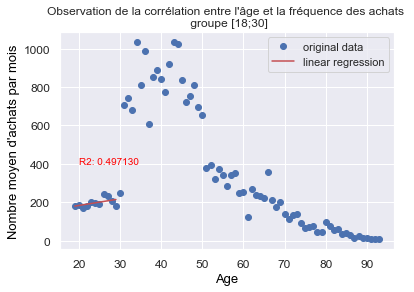

In [100]:
# Linéarisation sur groupe [18;30]

tp = temp2[(temp2.session < 13072) & (temp2.age != 18)]

# Observation de la relation entre l'âge des clients et le montant total des achats
X = tp['age']
Y = tp['session']

X2 = tp[tp.age < 30]['age']
Y2 = tp[tp.age < 30]['session']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# Plot
plt.plot(X, Y, 'o', label='original data')
plt.plot(X2, intercept + slope*X2, 'r', label='linear regression')

# Plot settings
plt.title('Observation de la corrélation entre l\'âge et la fréquence des achats \n groupe [18;30]')
plt.text(20,400,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Age', color='black', size=13)
plt.xticks(size=12)
plt.ylabel("Nombre moyen d'achats par mois", color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/scatterplot_age_freq_gp1.png')

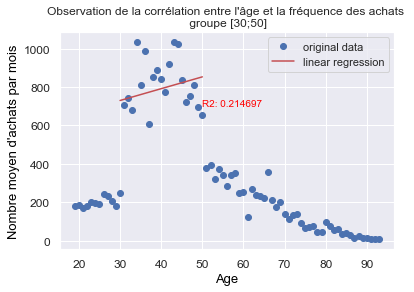

In [101]:
# Linéarisation sur groupe [30;50]

tp = temp2[(temp2.session < 13072) & (temp2.age != 18)]

# Observation de la relation entre l'âge des clients et le montant total des achats
X = tp['age']
Y = tp['session']

X2 = tp[(tp.age >= 30) & (tp.age <= 50)]['age']
Y2 = tp[(tp.age >= 30) & (tp.age <= 50)]['session']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# Plot
plt.plot(X, Y, 'o', label='original data')
plt.plot(X2, intercept + slope*X2, 'r', label='linear regression')

# Plot settings
plt.title('Observation de la corrélation entre l\'âge et la fréquence des achats \n groupe [30;50]')
plt.text(50,700,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Age', color='black', size=13)
plt.xticks(size=12)
plt.ylabel("Nombre moyen d'achats par mois", color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/scatterplot_age_freq_gp2.png')

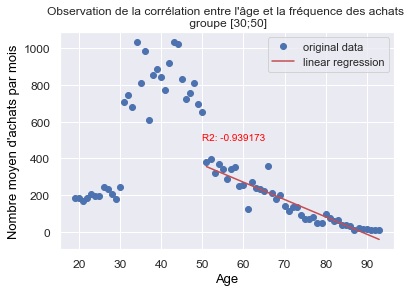

In [102]:
# Linéarisation sur groupe [> 50]

tp = temp2[(temp2.session < 13072) & (temp2.age != 18)]

# Observation de la relation entre l'âge des clients et le montant total des achats
X = tp['age']
Y = tp['session']

X2 = tp[(tp.age >50)]['age']
Y2 = tp[(tp.age > 50)]['session']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X2, Y2)

# Plot
plt.plot(X, Y, 'o', label='original data')
plt.plot(X2, intercept + slope*X2, 'r', label='linear regression')

# Plot settings
plt.title('Observation de la corrélation entre l\'âge et la fréquence des achats \n groupe [30;50]')
plt.text(50,500,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Age', color='black', size=13)
plt.xticks(size=12)
plt.ylabel("Nombre moyen d'achats par mois", color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/scatterplot_age_freq_gp2.png')

<div class="alert alert-block alert-info">

Les résultats de linéarisation et de calcul de Pearson ne sont pas concluants sur les sous-groupes sauf pour le groupe de > 50 ans car la liaison est linéaire et monotone.

### Âge vs taille du panier

#### Statistique descriptive

In [103]:
# Dataframe : nb d'items par panier representés dans la colonne session

df_corr2.sort_values(by='session').tail()

,age,id_session,id_client,Y,M,J,price,categ,birth,session
34062,34,93892,97524,24252,108,264,130.58,3,23856,12
27736,32,168560,94260,24264,24,252,182.24,4,23880,12
106969,52,96857,71799,26273,117,364,277.31,4,25610,13
24599,32,21005,107939,26273,52,195,162.20,4,25870,13
20078,30,118668,83930,28294,154,168,264.99,6,27888,14


In [104]:
# Moyenne des items par panier selon l'âge

df_corr3 = df_corr2[['age','session']].groupby('age').mean().reset_index()

df_corr3.head()

,age,session
0,18,1.757054
1,19,1.724901
2,20,1.742947
3,21,1.732310
4,22,1.843220


*Les groupes d'âges sont issus des observations faîtes dans la partie corrélation*

In [105]:
# Création de groupe d'âges

gp1 = df_corr3[df_corr3.age<30]
gp2 = df_corr3[(df_corr3.age >= 30) & (df_corr3.age <= 50) ]
gp3 = df_corr3[df_corr3.age > 50]

In [113]:
# Statistic Descriptive : nombre d'items moyen par groupe d'âges

tp1 = pd.DataFrame({'categorie': ['Tout âge'],
'Mean': [df_corr3.session.mean()],
'Mode':[df_corr3.session.mode()[0]],
'Variance': [df_corr3.session.var(ddof=0)],
'StDev':[df_corr3.session.std(ddof=0)],          
'Skewness': [df_corr3.session.skew()], 
'Kurtosis': [df_corr3.session.kurtosis()] })

tp1['Limite Out. +2'] = 2 * tp1['StDev'] + tp1['Mean']
tp1['Limite Out. -2'] = tp1['Mean'] - 2 * tp1['StDev']

tp = pd.DataFrame({'categorie': ['18-30','30-50','50-90'],
'Mean': [gp1.session.mean(),gp2.session.mean(),gp3.session.mean()],
'Mode':[gp1.session.mode()[0],gp2.session.mode()[0],gp3.session.mode()[0]],
'Variance': [gp1.session.var(ddof=0),gp2.session.var(ddof=0), gp3.session.var(ddof=0)],
'StDev':[gp1.session.std(ddof=0),gp2.session.std(ddof=0),gp3.session.std(ddof=0)],          
'Skewness': [gp1.session.skew(),gp2.session.skew(),gp3.session.skew()], 
'Kurtosis': [gp1.session.kurtosis(),gp2.session.kurtosis(),gp3.session.kurtosis()] })

tp['Limite Out. +2'] = 2 * tp['StDev'] + tp['Mean']
tp['Limite Out. -2'] = tp['Mean'] - 2 * tp['StDev']

tp = tp.append(tp1)
tp

,categorie,Mean,Mode,Variance,StDev,Skewness,Kurtosis,Limite Out. +2,Limite Out. -2
0,18-30,1.771354,1.714036,0.001901,0.043595,0.736010,-0.240043,1.858544,1.684164
1,30-50,2.384333,1.732824,0.021831,0.147753,-4.376488,19.665421,2.679839,2.088827
2,50-90,1.453827,1.342574,0.004990,0.070639,1.303875,3.059952,1.595104,1.312550
0,Tout âge,1.761076,1.342574,0.169919,0.412212,0.813013,-1.067998,2.585500,0.936653


<div class="alert alert-block alert-info">
    
- Le groupe des 18-30 ans présente une asymétrie faible et positive et un aplatissement négatif : signe que les valeurs sont plus concentrés autour de la moyenne que la Normale.
    
    
- Le groupe des 30-50 ans présente une asymétrie négative signe que certaines valeurs extrêmes décalent la moyenne vers les faibles valeurs.
    - Autrement dit, certains clients achètent en moyenne beaucoup moins de livres à chaque session d'achat.
    
    
- Le groupe des > 50 ans présente une asymétrie faible et positive et un aplatissement supérieur à la Normale : signe que des valeurs extrêmes décalent la moyenne vers les hautes valeurs.
    - Autrement dit, certains clients achètent en moyenne plus de livres à chaque session d'achat.

#### Distribution

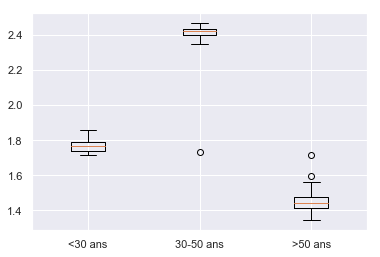

In [107]:
# Taille moyenne du panier (en nb d'items) selon groupe d'âges

data_1 = gp1.session.tolist()
data_2 = gp2.session.tolist()
data_3 = gp3.session.tolist()
dataset = [data_1,data_2,data_3]

# Plot 
BoxName = ['<30 ans','30-50 ans','>50 ans']
plt.boxplot(dataset)
pylab.xticks([1,2,3], BoxName)

plt.savefig('reports/Clients/boxplot_age_panier.png')

<div class="alert alert-block alert-info">

- Le groupe des 30-50 ans achètent en moyenne plus de livres par panier.
- Le groupe des moins de 50 ans achètent en moyenne moins de livres par panier.

- 1 outlier sur le groupe des 30-50 ans à : 1.75
- 2 outliers sur le groupe des > 50 ans à : 1.6 et 1.7.

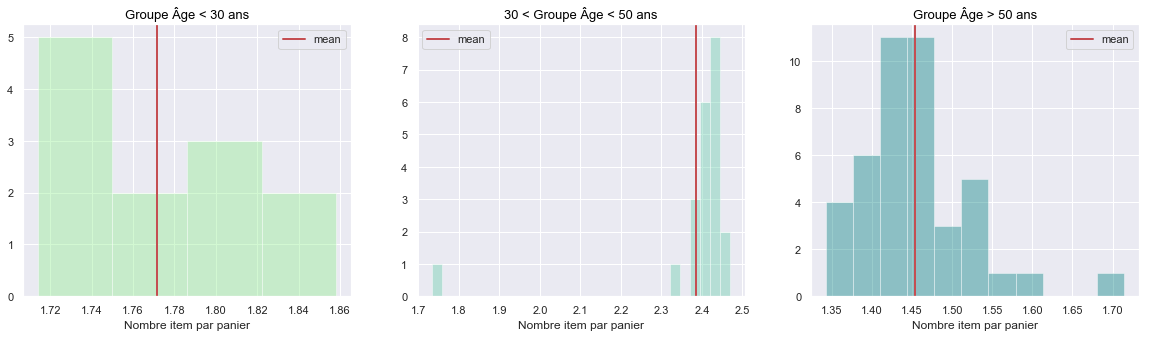

In [108]:
# Distribution du nombre d'items moyens par panier par groupe d'âge

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))

x = pd.Series(gp1.session, name="Nombre item par panier")
sns.distplot(x, color="lightgreen",kde=False,ax=ax1)
ax1.set_title('Groupe Âge < 30 ans', color='black', size=13)
ax1.axvline(gp1.session.mean(), color='r', linewidth=2, label = 'mean')
ax1.legend()

x2 = pd.Series(gp2.session, name="Nombre item par panier")
sns.distplot(x2, color="mediumaquamarine",kde=False,ax=ax2)
ax2.set_title('30 < Groupe Âge < 50 ans', color='black', size=13)
ax2.axvline(gp2.session.mean(), color='r', linewidth=2, label = 'mean')
ax2.legend()

x3 = pd.Series(gp3.session, name="Nombre item par panier")
sns.distplot(x3, color="teal",kde=False,ax=ax3)
ax3.set_title('Groupe Âge > 50 ans', color='black', size=13)
ax3.axvline(gp3.session.mean(), color='r', linewidth=2, label = 'mean')
ax3.legend()

# BackUp
plt.savefig('reports/Clients/Hist_items_gp.png')

<div class="alert alert-block alert-info">

- La distribution du nombre d'items par panier est différente selon le groupe d'âge considéré.
   
   - Les 30-50 achètent plus de livres par paniers.

- Présence de outliers qui crée une asymétrie +/- forte sur le groupe des 30-50 ans et > 50 ans.

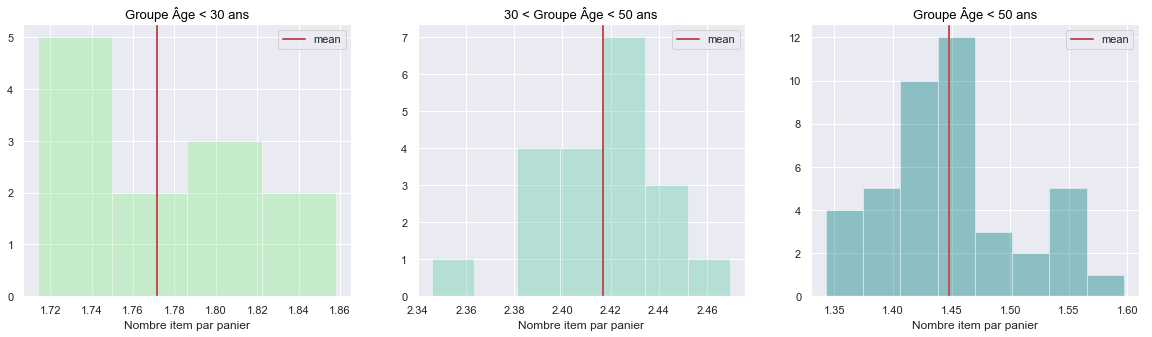

In [109]:
# Distribution du nombre d'items par panier par groupe d'âge - sans outliers 

X = gp1['session']
X2 = gp2[gp2.session > 1.75]['session']
X3 = gp3[gp3.session < 1.65]['session']

# Plot
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,5))

x = pd.Series(X, name="Nombre item par panier")
sns.distplot(x, color="lightgreen",kde=False,ax=ax1)
ax1.set_title('Groupe Âge < 30 ans', color='black', size=13)
ax1.axvline(X.mean(), color='r', linewidth=2, label = 'mean')
ax1.legend()

x2 = pd.Series(X2, name="Nombre item par panier")
sns.distplot(x2, color="mediumaquamarine",kde=False,ax=ax2)
ax2.set_title('30 < Groupe Âge < 50 ans', color='black', size=13)
ax2.axvline(X2.mean(), color='r', linewidth=2, label = 'mean')
ax2.legend()

x3 = pd.Series(X3, name="Nombre item par panier")
sns.distplot(x3, color="teal",kde=False,ax=ax3)
ax3.set_title('Groupe Âge < 50 ans', color='black', size=13)
ax3.axvline(X3.mean(), color='r', linewidth=2, label = 'mean')
ax3.legend()

# BackUp
plt.savefig('reports/Clients/Hist_items_gp_out.png')

<div class="alert alert-block alert-info">

L'élimination des outliers permet de recentrer la distribution sur la moyenne.

#### Corrélation

**Linéaire**

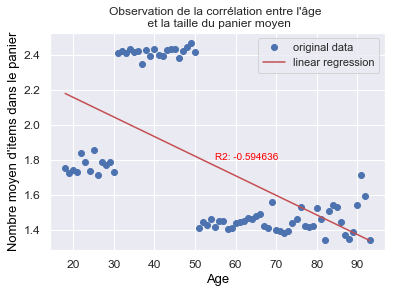

In [110]:
# Scatter plot : Âge vs Taille du panier moyen

X = df_corr3['age']
Y = df_corr3['session']

# Linear model
slope, intercept, r_value, p_value, std_err = ss.linregress(X, Y)

# Plot
plt.plot(X, Y, 'o', label='original data')
plt.plot(X, intercept + slope*X, 'r', label='linear regression')

# Plot settings
plt.title('Observation de la corrélation entre l\'âge \n et la taille du panier moyen')
plt.text(55,1.8,"R2: %f " % (r_value), color = 'red')
plt.legend()

plt.xlabel('Age', color='black', size=13)
plt.xticks(size=12)
plt.ylabel("Nombre moyen d'items dans le panier", color='black', size=13)
plt.yticks(size=12)

plt.savefig('reports/Clients/scatterplot_age_item.png')
plt.show()

In [111]:
ss.pearsonr(X, Y)

(-0.5946358543171337, 1.4806852599082072e-08)

In [112]:
ss.spearmanr(X, Y, axis=0)

SpearmanrResult(correlation=-0.6571975393028024, pvalue=1.1334726061679774e-10)

<div class="alert alert-block alert-info">
    
**Observations:**

- Le coefficient de corrélation de Pearson est faible et peu probant. Il révèle **une faible relation linéaire entre entre l'âge et la taille du panier.**

La liaison n'est clairement pas monotone. Le coefficient de Pearson n'est donc pas le plus adapté pour traduire l'intensité de la liaison entre nos 2 variables. Spearman est à peine meilleur car la relation n'est visuellement pas linéaire. Effet de groupe avec homogéneité de la réponse au sein des groupes.

On peut découper nos données en groupe d'âges ayant une liaison monotone.

-  < 30 ans / 30-50 ans / > 50 ans.**


**Au sein des groupes, on ne distingue pas de liaison entre les 2 variables.** Les données sont agrégées autour de la moyenne de chaque groupe. Ce que l'on a déjà observé sur l'histogramme de distribution.


https://rstudio-pubs-static.s3.amazonaws.com/213377_343898b65b19442da89bc220e41ceb43.html